In [194]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
%load_ext tensorboard

In [86]:
train_df = pd.read_csv("/Users/shreejakikkisetti/Desktop/CMaps/train_FD001.txt", sep=" ",header=None)

In [87]:
test_df = pd.read_csv("/Users/shreejakikkisetti/Desktop/CMaps/test_FD001.txt", sep=" ",header=None)

In [88]:
train_df.drop(columns=[26,27],inplace=True)
test_df.drop(columns=[26,27],inplace=True)


In [89]:
test_df


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [90]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [91]:
test_labels=pd.read_csv("/Users/shreejakikkisetti/Desktop/CMaps/RUL_FD001.txt", sep=" ",header=None)


In [92]:
test_labels

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN
...,...,...
95,137,NaN
96,82,NaN
97,59,NaN
98,117,NaN


In [93]:
columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]



In [94]:
train_df.columns = columns
test_df.columns = columns

In [95]:
train_df.drop(columns = ['TRA', 'T2','P2', 'farB', 'Nf_dmd', 'PCNfR_dmd', 'epr'], inplace=True)

In [96]:
train_df

,unit_number,time_in_cycles,setting_1,setting_2,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


In [97]:
test_df.drop(columns = ['TRA', 'T2','P2', 'farB', 'Nf_dmd', 'PCNfR_dmd', 'epr'], inplace=True)

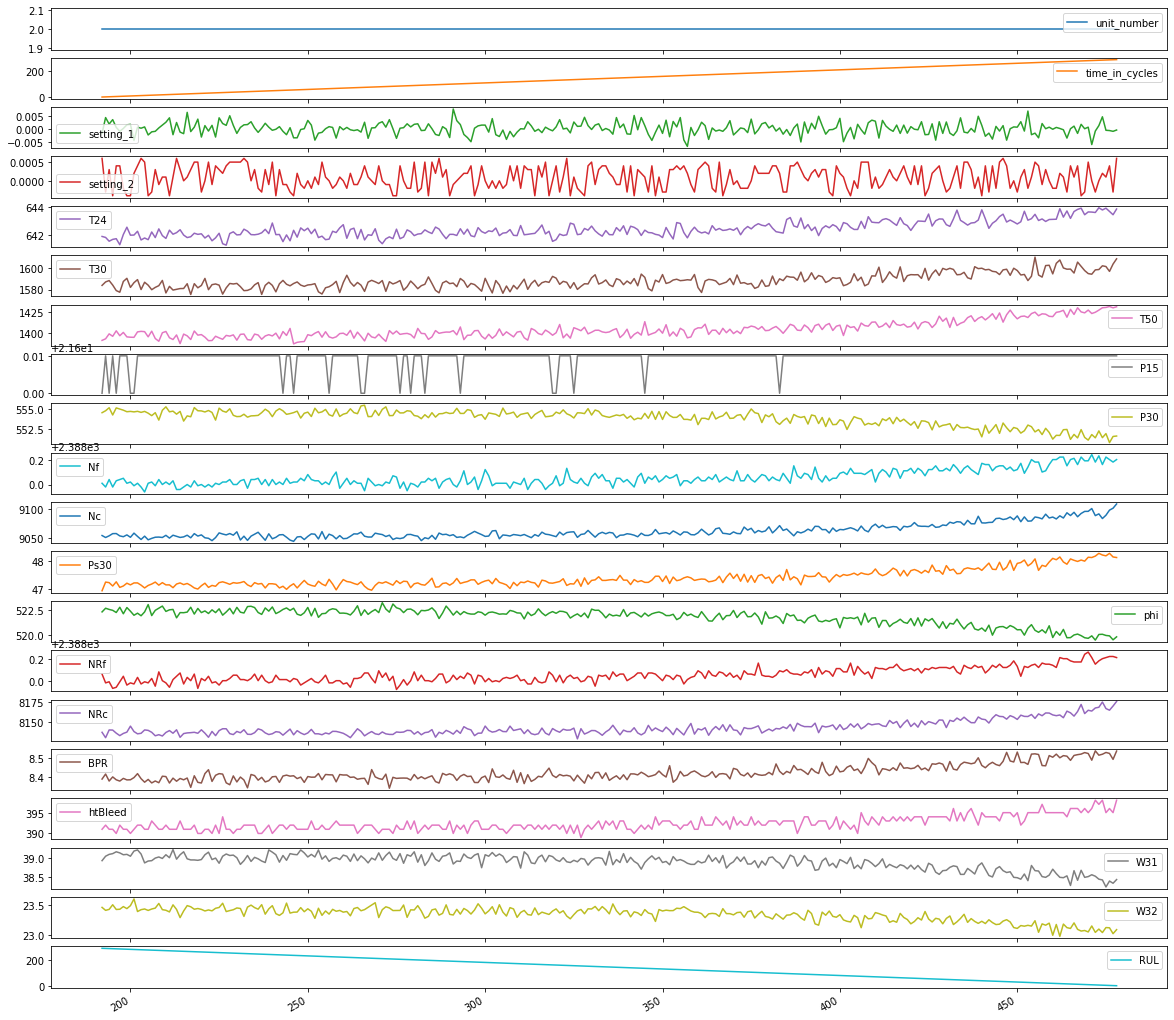

In [257]:
#plotting how the dataset looks for different cases

ax1 = train_df[train_df.unit_number == 2].plot(subplots=True, sharex=True, figsize=(20,20))

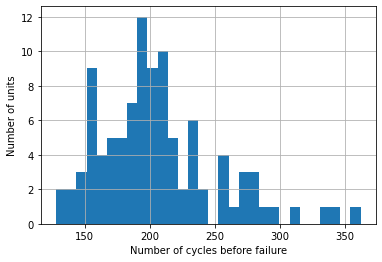

In [99]:
fig, ax = plt.subplots()
train_df.groupby('unit_number')['time_in_cycles'].max().hist(ax=ax, bins=30);
ax.set_xlabel("Number of cycles before failure");
ax.set_ylabel("Number of units");

In [116]:
x = train_df.groupby('unit_number')['time_in_cycles'].max()
print(min(x))

128


In [100]:
test_labels

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN
...,...,...
95,137,NaN
96,82,NaN
97,59,NaN
98,117,NaN


In [274]:
# df1 = train_df.copy()
# for i in range(train_df['unit_number'].max()+1):
grouped_df = df.groupby("unit_number")
j_arr = grouped_df['time_in_cycles'].max()
# j_arr =  maximums['time_in_cycles']
RUL = []
count = 0
for j in j_arr:
    for i in range(j):
        x = j
        y = df['time_in_cycles'][count]
        Rul = x-y
        RUL.append(Rul)
        print(count)
        count = count + 1


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [276]:
train_df['RUL'] = RUL

In [277]:
train_df

,unit_number,time_in_cycles,setting_1,setting_2,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


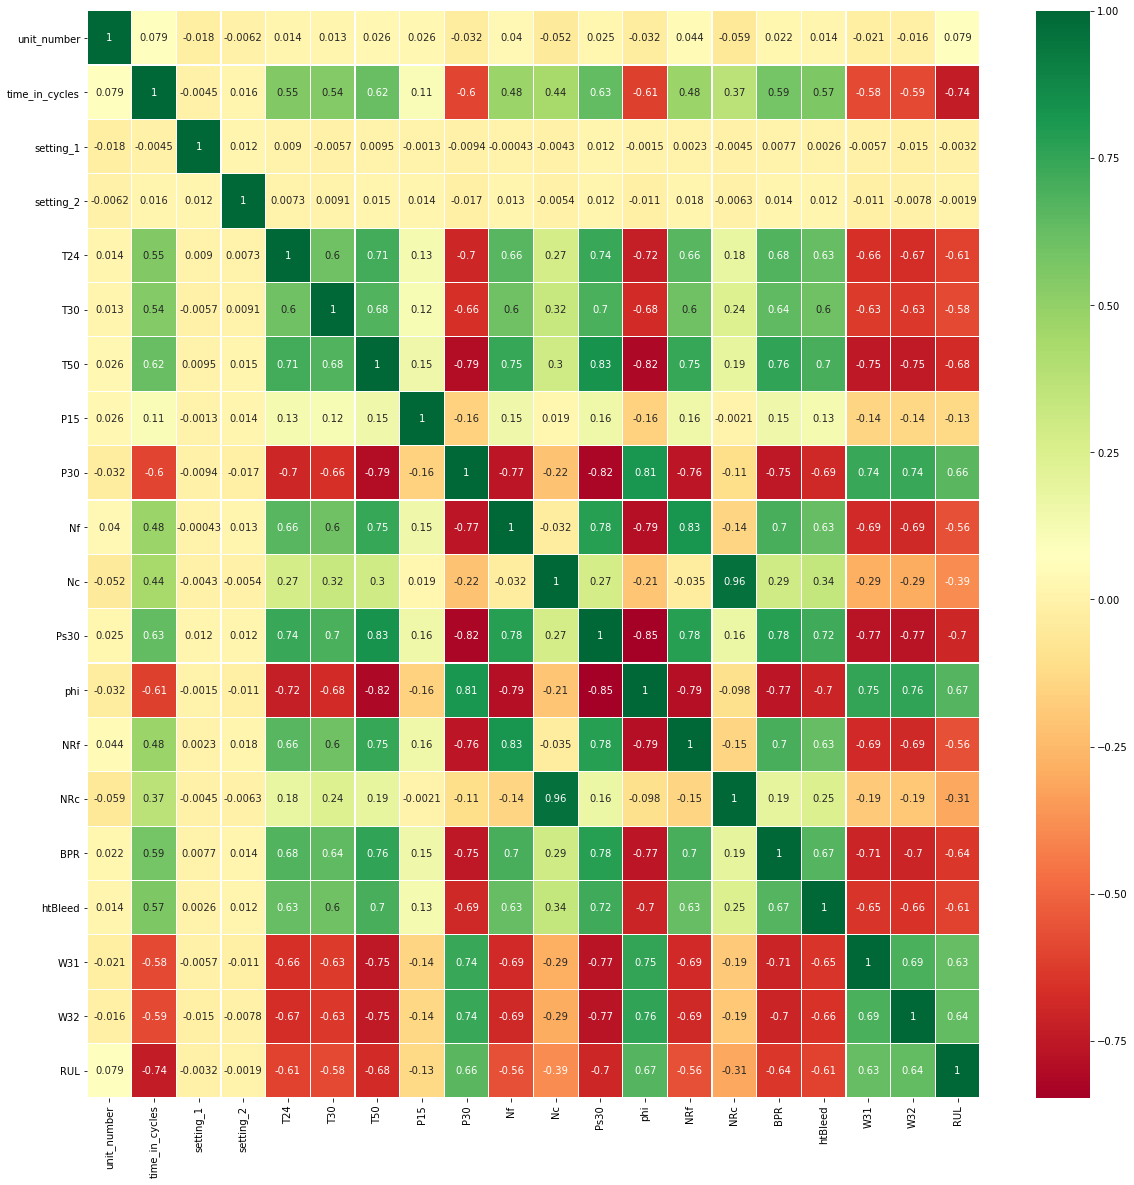

In [280]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(train_df.corr(), ax=ax, annot=True,cmap='RdYlGn',linewidths=0.2);

In [103]:
modified_columns = train_df.columns

In [147]:
modified_columns = modified_columns.delete(-1)
modified_columns = modified_columns.delete(0)
modified_columns = modified_columns.delete(1)

In [148]:
modified_columns


Index(['time_in_cycles', 'setting_2', 'T24', 'T30', 'T50', 'P15', 'P30', 'Nf',
       'Nc', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31'],
      dtype='object')

In [169]:
def prepare_train_data(df):
    data_list = []
    target_list = []
    for unit_number in df.unit_number.unique():
        unit = df[df.unit_number == unit_number]
        data_list.append(np.array(unit[modified_columns])[:127,:])
        target_list.append(np.array(unit["RUL"])[127])
    return (np.stack(data_list), np.array(target_list).T)

In [215]:
x_train, y_train = prepare_train_data(train_df)


train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))

train_batch = next(iter(train_ds.batch(2)))

train_batch

(<tf.Tensor: shape=(2, 127, 16), dtype=float64, numpy=
 array([[[ 1.0000e+00, -4.0000e-04,  6.4182e+02, ...,  8.4195e+00,
           3.9200e+02,  3.9060e+01],
         [ 2.0000e+00, -3.0000e-04,  6.4215e+02, ...,  8.4318e+00,
           3.9200e+02,  3.9000e+01],
         [ 3.0000e+00,  3.0000e-04,  6.4235e+02, ...,  8.4178e+00,
           3.9000e+02,  3.8950e+01],
         ...,
         [ 1.2500e+02,  5.0000e-04,  6.4296e+02, ...,  8.4079e+00,
           3.9400e+02,  3.8680e+01],
         [ 1.2600e+02,  1.0000e-04,  6.4249e+02, ...,  8.4378e+00,
           3.9200e+02,  3.8850e+01],
         [ 1.2700e+02,  2.0000e-04,  6.4299e+02, ...,  8.4626e+00,
           3.9300e+02,  3.8910e+01]],
 
        [[ 1.0000e+00,  6.0000e-04,  6.4189e+02, ...,  8.3905e+00,
           3.9100e+02,  3.8940e+01],
         [ 2.0000e+00, -3.0000e-04,  6.4182e+02, ...,  8.4167e+00,
           3.9200e+02,  3.9060e+01],
         [ 3.0000e+00,  3.0000e-04,  6.4155e+02, ...,  8.3802e+00,
           3.9100e+02,  3.911

In [283]:
y_train.shape

(100,)

In [220]:
x_train

array([[[ 1.0000e+00, -4.0000e-04,  6.4182e+02, ...,  8.4195e+00,
          3.9200e+02,  3.9060e+01],
        [ 2.0000e+00, -3.0000e-04,  6.4215e+02, ...,  8.4318e+00,
          3.9200e+02,  3.9000e+01],
        [ 3.0000e+00,  3.0000e-04,  6.4235e+02, ...,  8.4178e+00,
          3.9000e+02,  3.8950e+01],
        ...,
        [ 1.2500e+02,  5.0000e-04,  6.4296e+02, ...,  8.4079e+00,
          3.9400e+02,  3.8680e+01],
        [ 1.2600e+02,  1.0000e-04,  6.4249e+02, ...,  8.4378e+00,
          3.9200e+02,  3.8850e+01],
        [ 1.2700e+02,  2.0000e-04,  6.4299e+02, ...,  8.4626e+00,
          3.9300e+02,  3.8910e+01]],

       [[ 1.0000e+00,  6.0000e-04,  6.4189e+02, ...,  8.3905e+00,
          3.9100e+02,  3.8940e+01],
        [ 2.0000e+00, -3.0000e-04,  6.4182e+02, ...,  8.4167e+00,
          3.9200e+02,  3.9060e+01],
        [ 3.0000e+00,  3.0000e-04,  6.4155e+02, ...,  8.3802e+00,
          3.9100e+02,  3.9110e+01],
        ...,
        [ 1.2500e+02,  1.0000e-04,  6.4271e+02, ...,  

In [ ]:
DNN                   

In [205]:
model = tf.keras.models.Sequential()

norm = tf.keras.layers.experimental.preprocessing.Normalization()
norm.adapt(x_train)
model.add(norm)

model.add(tf.keras.layers.LSTM(32, dropout=0.2))

model.add(tf.keras.layers.Dense(1))

model.add(tf.keras.layers.Lambda(lambda x: x * 206))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4), loss="mse", metrics=[tf.keras.metrics.RootMeanSquaredError()])



In [206]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_6 (Normalizati (None, None, 16)          33        
_________________________________________________________________
lstm_19 (LSTM)               (None, 32)                6272      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
_________________________________________________________________
lambda_2 (Lambda)            (None, 1)                 0         
Total params: 6,338
Trainable params: 6,305
Non-trainable params: 33
_________________________________________________________________


In [207]:
model(train_batch[0])





<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[-100.63973 ],
       [ -65.125824]], dtype=float32)>

In [208]:
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [209]:
 model.fit(train_ds.batch(5), epochs=100, verbose=2)

Epoch 1/100
20/20 - 0s - loss: 18134.8242 - root_mean_squared_error: 134.6656
Epoch 2/100
20/20 - 0s - loss: 10096.7666 - root_mean_squared_error: 100.4827
Epoch 3/100
20/20 - 0s - loss: 6068.3262 - root_mean_squared_error: 77.8995
Epoch 4/100
20/20 - 0s - loss: 4510.5342 - root_mean_squared_error: 67.1605
Epoch 5/100
20/20 - 0s - loss: 2998.5312 - root_mean_squared_error: 54.7588
Epoch 6/100
20/20 - 0s - loss: 2716.9858 - root_mean_squared_error: 52.1247
Epoch 7/100
20/20 - 0s - loss: 2210.2065 - root_mean_squared_error: 47.0128
Epoch 8/100
20/20 - 0s - loss: 2013.9761 - root_mean_squared_error: 44.8773
Epoch 9/100
20/20 - 0s - loss: 1746.3510 - root_mean_squared_error: 41.7894
Epoch 10/100
20/20 - 0s - loss: 1701.5032 - root_mean_squared_error: 41.2493
Epoch 11/100
20/20 - 0s - loss: 1571.6361 - root_mean_squared_error: 39.6439
Epoch 12/100
20/20 - 0s - loss: 1669.9812 - root_mean_squared_error: 40.8654
Epoch 13/100
20/20 - 0s - loss: 1473.9471 - root_mean_squared_error: 38.3920
Epoc

In [1]:
len(y_train)

NameError: name 'y_train' is not defined

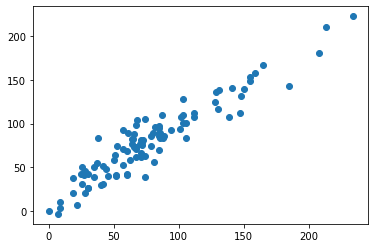

In [210]:
plt.scatter(y_train, model.predict(x_train));

In [211]:
len(y_train)

100

In [212]:
len(x_train)

100

In [213]:
predictions = model.predict(x_train)

In [216]:
len(predictions)

100